<a href="https://colab.research.google.com/github/aayush17125/Image_Classification/blob/master/IIITD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("Welcome to Coding Blocks")

Welcome to Coding Blocks


In [0]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [0]:
frame = pd.read_csv("sample_data/mnist_train_small.csv")

In [0]:
type(frame)

pandas.core.frame.DataFrame

In [0]:
frame.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
total = frame.values


In [0]:
type(total)

numpy.ndarray

In [0]:
X = total[:, 1:]
y = total[:, 0:1]

In [0]:
line = X[1]

In [0]:
line.shape

(784,)

In [0]:
img = line.reshape(28, 28)

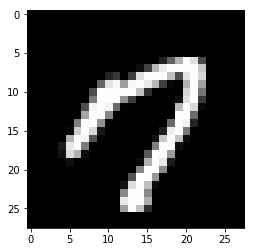

In [0]:
plt.imshow(img, cmap="gray")

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [0]:
y_hot = np_utils.to_categorical(y)

In [0]:
y[:5]

array([[5],
       [7],
       [9],
       [5],
       [2]])

In [0]:
y_hot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()

model.add(Dense(400, activation="tanh", input_shape=(784,)))
model.add(Dense(100, activation="tanh"))
model.add(Dense(40, activation="tanh"))
model.add(Dense(10, activation="softmax"))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_7 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                410       
Total params: 358,550
Trainable params: 358,550
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [0]:
model.fit(X, y_hot, batch_size=500, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
19999/19999 [==============================] - 2s 108us/step - loss: 0.9950 - acc: 0.7113
Epoch 2/10
19999/19999 [==============================] - 1s 73us/step - loss: 0.4213 - acc: 0.8893
Epoch 3/10
19999/19999 [==============================] - 1s 72us/step - loss: 0.3227 - acc: 0.9123
Epoch 4/10
19999/19999 [==============================] - 1s 71us/step - loss: 0.2812 - acc: 0.9188
Epoch 5/10
19999/19999 [==============================] - 1s 73us/step - loss: 0.2547 - acc: 0.9274
Epoch 6/10
19999/19999 [==============================] - 1s 71us/step - loss: 0.2469 - acc: 0.9273
Epoch 7/10
19999/19999 [==============================] - 1s 71us/step - loss: 0.2292 - acc: 0.9317
Epoch 8/10
19999/19999 [==============================] - 1s 70us/step - loss: 0.2215 - acc: 0.9325
Epoch 9/10
19999/19999 [==============================] - 1s 70us/step - loss: 0.2157 - acc: 0.9361
Epoch 10/10
19999/19999 [==========================

In [0]:
model.evaluate(X, y_hot)

19999/19999 [==============================] - 1s 57us/step


[0.20282701651503654, 0.9385469273553084]

In [0]:
tot_test = pd.read_csv("sample_data/mnist_test.csv").values

X_test = tot_test[:, 1:]
y_test = tot_test[:, 0:1]

In [0]:
y_hot_test = np_utils.to_categorical(y_test)

In [0]:
model.evaluate(X_test, y_hot_test)

9999/9999 [==============================] - 1s 54us/step


[0.24222571442131163, 0.9254925492549255]

In [0]:
np.argmax(model.predict(X_test[:10]), axis=1)

array([2, 1, 0, 4, 1, 4, 9, 6, 4, 0])

In [0]:
y_test[:10]

array([[2],
       [1],
       [0],
       [4],
       [1],
       [4],
       [9],
       [5],
       [9],
       [0]])